## CNN
Filter :
* weights are iterated with loss function (through learning )
* In a CNN there could be hundreds of filters
* It is stacks of layers 

Layer1|Layer2|Layer3|Layer4|Layer5|Layer6|Layer7|Layer8|Layer9
------|------|------|------|------|------|------|------|------
Input > | Conv2D > | MaxPooling > | Conv2D > | MaxPooling > | Conv2D > |Flatten > | Classes| Classes
Image of 32x32 > | Filters 16 > | MaxPooling > | Filters 32 > | MaxPooling > | Filters 64 > | Flatten > | wheels=yes Eyes=yes tails=yes | car= 0.1 Dog=09


### Same cifar10 on MLP gave 40% accuracy where as on CNN it gave 66%




Jupyter notebook shortcuts    
https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

### 1. Load CIFAR-10 Database

In [25]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()


### 2. Visualize the first 24 Training images

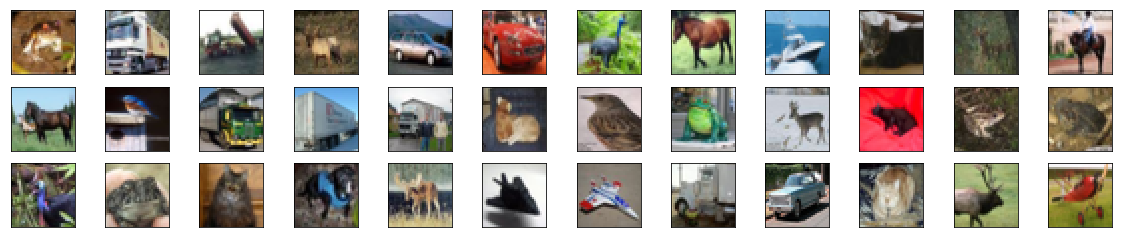

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(20,4))
for i in range(36):
    ax=fig.add_subplot(3,12, i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    

### 3. Rescale the images by dividing Every  image by 255

In [28]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

### 4.Break Dataset into Training,Testing and Validation sets

In [29]:
from keras.utils import np_utils

#one-hot encode the lables

num_classes=len(np.unique(y_train))
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

#break training set into training and validation sets
(x_train,x_valid)=x_train[5000:],x_train[:5000]
(y_train,y_valid)=y_train[5000:],y_train[:5000]

#print shape of training set
print('x_train shape:',x_train.shape)

#print number of training ,validation , and test images
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')
print(x_valid.shape[0],'validation samples')


#print number of training ,validation , and test labels
print(y_train.shape[0],'train labels')
print(y_test.shape[0],'test labels')
print(y_valid.shape[0],'validation labels')



x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples
45000 train labels
10000 test labels
5000 validation labels


### 5.Define the Model Architecture

In [30]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten

#define the model

model=Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
_________________________________________________________________


### 6.Compile the Model

In [31]:
# Compile the model

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

### 7.Train the Model

In [33]:
from keras.callbacks import ModelCheckpoint

#train the model
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5',verbose=1,save_best_only=True)
hist=model.fit(x_train,y_train,batch_size=32,epochs=20,
              validation_data=(x_valid,y_valid),callbacks=[checkpointer],
              verbose=2,shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 28s - loss: 1.7790 - acc: 0.3654 - val_loss: 1.7334 - val_acc: 0.3714

Epoch 00001: val_loss improved from inf to 1.73340, saving model to MLP.weights.best.hdf5
Epoch 2/20
 - 28s - loss: 1.7725 - acc: 0.3659 - val_loss: 1.7762 - val_acc: 0.3592

Epoch 00002: val_loss did not improve
Epoch 3/20
 - 28s - loss: 1.7726 - acc: 0.3684 - val_loss: 1.6663 - val_acc: 0.4116

Epoch 00003: val_loss improved from 1.73340 to 1.66629, saving model to MLP.weights.best.hdf5
Epoch 4/20
 - 28s - loss: 1.7678 - acc: 0.3686 - val_loss: 1.7539 - val_acc: 0.3608

Epoch 00004: val_loss did not improve
Epoch 5/20
 - 28s - loss: 1.7645 - acc: 0.3722 - val_loss: 1.7198 - val_acc: 0.3726

Epoch 00005: val_loss did not improve
Epoch 6/20
 - 28s - loss: 1.7680 - acc: 0.3710 - val_loss: 1.7071 - val_acc: 0.4006

Epoch 00006: val_loss did not improve
Epoch 7/20
 - 29s - loss: 1.7651 - acc: 0.3732 - val_loss: 1.9523 - val_acc: 0.3144

Epoch 00007: val_los

### 8.Load the Model with the Best Classification  Accuracy on the Validation Set

In [34]:
#load the weights that yielded the best validation accuracy

model.load_weights('MLP.weights.best.hdf5')

### 9.Calculate Classification Accuracy on the Test Set

In [36]:
#evaluate and print test accuracy

score=model.evaluate(x_test,y_test,verbose=0)
#print('\n','Test accuracy',score[1])
accuracy=100*score[1]

print('Test accuracy: %.4f%%'% accuracy)

Test accuracy: 42.0100%
